In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import geopandas as gpd
import seaborn as sns

/tmp/ipykernel_1159773/2928044466.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
ki_old = read_csv('Combined-concat-before-karst-trim.csv', index_col='huc12')
ki_old.dropna(inplace=True, subset=['geometry'])
ki_old['geometry'] = gpd.GeoSeries.from_wkt(ki_old.geometry)
ki_old = gpd.GeoDataFrame(ki_old)
ki_old.drop_duplicates(inplace=True)
ki_old = ki_old[~ki_old.index.duplicated(keep='first')]
ki_old = ki_old[ki_old.p_karst>0]


ki = read_csv('Combined-concat.csv', index_col='huc12')
ki.dropna(inplace=True, subset=['geometry'])
ki['geometry'] = gpd.GeoSeries.from_wkt(ki.geometry)
ki = gpd.GeoDataFrame(ki)
ki.drop_duplicates(inplace=True)
ki = ki[~ki.index.duplicated(keep='first')]
ki = ki[ki.p_karst>0]


<AxesSubplot: xlabel='p_karst', ylabel='Count'>

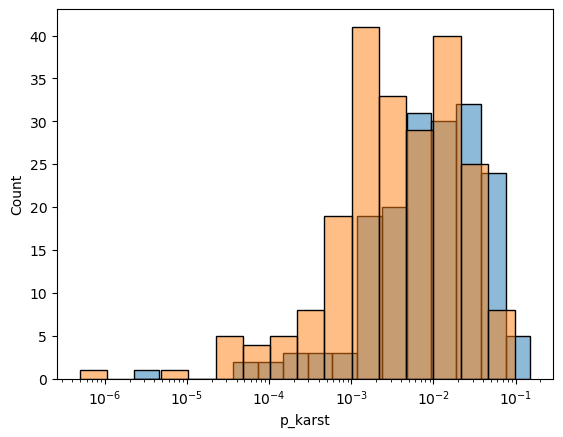

In [3]:

sns.histplot(ki, x='p_karst', log_scale=True, alpha=0.5)
sns.histplot(ki_old, x='p_karst', log_scale=True, alpha=0.5)
#plt.legend(['Carbonate only','With non-carbs'])

In [4]:
p_k_ratio = ki.p_karst/ki_old.p_karst

Text(0.5, 0, 'p_carb only / p_full_huc')

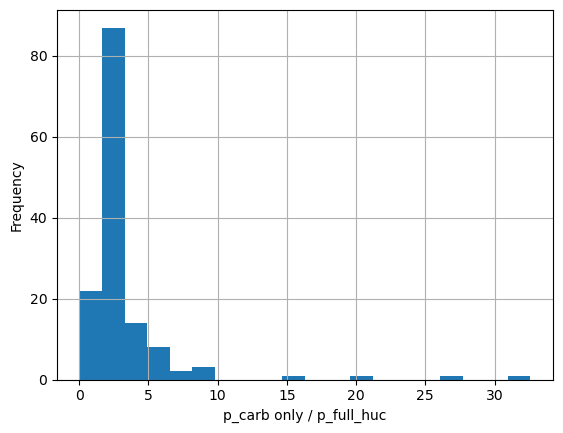

In [5]:
p_k_ratio.hist(bins=20)
plt.ylabel('Frequency')
plt.xlabel('p_carb only / p_full_huc')

In [6]:
p_k_ratio[~np.isnan(p_k_ratio)]

huc12
20502061102      2.683637
20502061204      3.225755
20503020104      1.659646
20503020303      5.999285
20503030602      2.197549
                  ...    
130700071302    20.691309
170102080303     7.253265
170102100308     8.823977
170102100401     3.857811
170102100402     0.368537
Name: p_karst, Length: 140, dtype: float64

In [7]:
ki

,Unnamed: 0,geometry,objectid,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,gnis_id,...,name,hutype,humod,tohuc,noncontributingareaacres,noncontributingareasqkm,globalid,p_karst,dem_res,box
huc12,,,,,,,,,,,,,,,,,,,,,
70400080501,0,"POLYGON ((-91.85592 43.98528, -91.85509 43.985...",44365,{4196D186-2536-4BED-B491-3BFCE8BE10AF},NaN,NaN,NaN,NaN,2013-01-18T07:08:27Z,NaN,...,Upper Rush Creek,S,KA,70400080502,0,0,{9F4F9C66-E29C-11E2-8094-0021280458E6},0.001137,3,MN3
70400080502,1,"POLYGON ((-91.72796 43.93967, -91.72836 43.938...",44366,{ED849447-A7B6-4C39-941B-F5DA4A9D9D36},NaN,NaN,NaN,NaN,2013-01-18T07:08:27Z,NaN,...,Middle Rush Creek,S,KA,70400080504,0,0,{9F4FBA84-E29C-11E2-8094-0021280458E6},0.001926,3,MN3
70400080503,2,"POLYGON ((-91.96521 43.93513, -91.96195 43.934...",44367,{19F57BCF-3C52-4C67-8604-90EBF8F69AE3},NaN,NaN,NaN,NaN,2013-01-18T07:08:27Z,NaN,...,Pine Creek,S,KA,70400080504,0,0,{9F4FD183-E29C-11E2-8094-0021280458E6},0.001357,3,MN3
70400030307,3,"POLYGON ((-91.90450 44.11892, -91.90416 44.117...",48071,{E34F8286-7DFF-4353-9377-E2C59204ECA6},NaN,NaN,NaN,NaN,2013-01-18T07:08:27Z,NaN,...,Lower South Fork Whitewater River,S,NM,70400030310,0,0,{A170489A-E29C-11E2-8094-0021280458E6},0.004244,3,MN3
70400030502,4,"POLYGON ((-91.74356 44.08254, -91.74345 44.082...",48525,{6011F003-69CF-42ED-809A-247AAFA72200},NaN,NaN,NaN,NaN,2013-01-18T07:08:27Z,NaN,...,Garvin Brook,S,NM,70400030606,0,0,{A19FE91E-E29C-11E2-8094-0021280458E6},0.000841,3,MN3
70400030501,5,"POLYGON ((-91.84660 44.14547, -91.84596 44.145...",48075,{BCCF1E64-3E49-459E-B2E8-B7F3A190E5C1},NaN,NaN,NaN,NaN,2013-01-18T07:08:27Z,NaN,...,Rollingstone Creek,S,NM,70400030502,0,0,{A170B502-E29C-11E2-8094-0021280458E6},0.003132,3,MN3
70400080106,0,"POLYGON ((-92.35965 43.93618, -92.35903 43.935...",50323,{6DA71C04-9F45-490B-8571-4B7CE8BEB338},NaN,NaN,NaN,NaN,2013-01-18T07:08:27Z,NaN,...,City of Stewartville-North Branch Root River,S,KA,70400080108,0,0,{A2B790DD-E29C-11E2-8094-0021280458E6},0.003089,3,MN2
70400080108,1,"POLYGON ((-92.27814 43.90522, -92.27753 43.904...",50325,{3C0FFA3A-BCF0-48A3-AF9F-5E7EA9D3F006},NaN,NaN,NaN,NaN,2013-01-18T07:08:27Z,NaN,...,North Branch Root River,S,KA,70400080303,0,0,{A2B7C6B4-E29C-11E2-8094-0021280458E6},0.017378,3,MN2
70400080203,2,"POLYGON ((-92.40240 43.83016, -92.39976 43.831...",50328,{CE57FEB7-C8ED-4B3A-A1B5-E0BD41A6224C},NaN,NaN,NaN,NaN,2013-01-18T07:08:27Z,NaN,...,Kedron Creek,S,KA,70400080204,0,0,{A2B81A4D-E29C-11E2-8094-0021280458E6},0.001949,3,MN2


In [25]:
import glob
import os
import datetime

csvs = glob.glob('./*/*.csv')
recent = datetime.datetime(2023,11,30,16,26)
for f in csvs:
    unix_time = os.path.getmtime(f)

    dt = datetime.datetime.fromtimestamp(unix_time)
    if dt<recent:        
        print(f, dt)
        #os.remove(f)


In [13]:
dt

datetime.datetime(2023, 8, 11, 15, 47, 47, 863278)

In [14]:
t = datetime.datetime(2023,8,10,15)

In [17]:
t>dt

False